| Tarea | Activacion Ult. Capa | Funcion de Perdida |
| --- | --- | --- |
| Regresion | Lineal | MSE |
| Clasificacion Binaria | Sigmoid | Binary Cross-entropy |
| Clasificacion multiclase | Softmax | Categorical Cross-entropy |

In [54]:
import jax.numpy as jnp
from jax.typing import ArrayLike
from jax.nn import one_hot
from jax import grad, jit, random
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from typing import Callable
from tqdm import tqdm
plt.style.use("ggplot")

# Regresion

- Activacion:

$$
f(\mathbf{x}) = \mathbf{x}
$$

In [2]:
def linear(x: ArrayLike) -> ArrayLike:
    return x

In [3]:
linear(1)

1

- Funcion de perdida:

$$
\mathcal{L} = \frac{1}{N} \sum_{i=1} ^ N (y_i - \tilde{y_i}) ^ 2\\
\mathcal{L} = \frac{1}{N} (\mathbf{y} - \tilde{\mathbf{y}}) ^ T (\mathbf{y} - \tilde{\mathbf{y}})
$$

In [4]:
def mse(y: ArrayLike, y_pred: ArrayLike) -> ArrayLike: # float
    return ((y - y_pred) ** 2).mean()

# Clasificacion Binaria

- Activacion:

$$
\sigma(x) = \frac{1}{1 + e ^ x}
$$

In [5]:
def sigmoid(x: ArrayLike) -> ArrayLike:
    return 1 / (1 + jnp.exp(x))

- Funcion de perdida:

$$
\mathcal{L} = -\frac{1}{N} \sum_{i=1} ^ N y_i \log{\tilde{y_i}} + (1 - y_i) \log{(1 - \tilde{y_i})}
$$

In [6]:
def binary_crossentropy(y: ArrayLike, y_pred: ArrayLike) -> ArrayLike: # float
    return -(
        (y * jnp.log(y_pred)) +
        ((1 - y) * jnp.log(1 - y_pred))
    ).mean()

# Clasificacion Multiclase

- Activacion

$$
\text{softmax}(\mathbf{x}) = \left(
    \begin{matrix}
        \frac{e ^ {x_1}}{\sum_{i=1} ^ m e^{x_i}} \\
        \frac{e ^ {x_2}}{\sum_{i=1} ^ m e^{x_i}} \\
        \vdots\\
        \frac{e ^ {x_m}}{\sum_{i=1} ^ m e^{x_i}} \\
    \end{matrix}
    \right)
$$

In [15]:
def softmax(x: ArrayLike) -> ArrayLike:
    exps = jnp.exp(x)
    return exps / exps.sum(axis=1, keepdims=True)

In [9]:
X = jnp.zeros(shape=(10, 5))

In [10]:
X

Array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
X.sum(axis=0, keepdims=True)

Array([[0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
X.sum(axis=1, keepdims=True)

Array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [16]:
x = jnp.array([[2, 3, 5, -1, 9, 0]])

In [17]:
jnp.argmax(x)

Array(4, dtype=int32)

In [20]:
y = softmax(x)
y

Array([[8.9236145e-04, 2.4256899e-03, 1.7923560e-02, 4.4428067e-05,
        9.7859317e-01, 1.2076799e-04]], dtype=float32)

<BarContainer object of 6 artists>

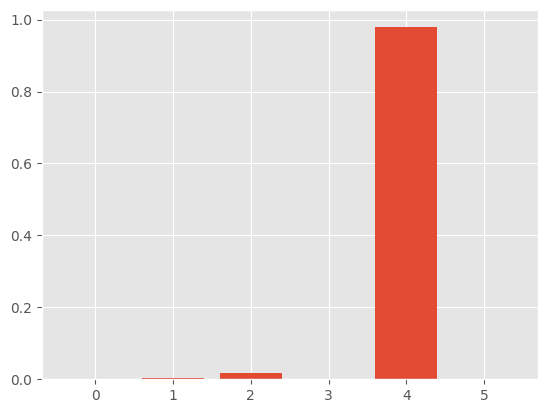

In [21]:
fig, ax = plt.subplots()
ax.bar(range(x.size), y[0])

- Funcion de perdida:

$$
\mathcal{L} = -\frac{1}{N}\sum_{i=1}^N \sum_{j=1}^K \mathbf{Y}_{ij} \log{\tilde{\mathbf{Y_{ij}}}}
$$

In [24]:
def crossentropy(y: ArrayLike, y_pred: ArrayLike) -> ArrayLike:
    return -(y * jnp.log(y_pred)).sum(axis=1).mean()

$$
[0, 1, 2, 3]\\
0 \rightarrow [1, 0, 0, 0]\\
1 \rightarrow [0, 1, 0, 0]\\
3 \rightarrow [0, 0, 0, 1]
$$

In [23]:
y = jnp.array([[0, 0, 1.]])

In [29]:
logits = jnp.array([[1., 1., 20.]])

In [30]:
probits = softmax(logits)

In [31]:
probits

Array([[5.6027960e-09, 5.6027960e-09, 9.9999994e-01]], dtype=float32)

In [32]:
crossentropy(y, probits)

Array(5.9604645e-08, dtype=float32)

In [37]:
features, labels = load_iris(return_X_y=True)

In [38]:
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.3, random_state=0
)

In [40]:
labels_train_oh = one_hot(labels_train, 3)
labels_test_oh = one_hot(labels_test, 3)

In [41]:
labels_train_oh.shape

(105, 3)

In [42]:
labels_train_oh[:10]

Array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [48]:
def predict(x: ArrayLike, w: ArrayLike) -> ArrayLike:
    x_ones = jnp.concatenate(
        [x, jnp.ones((x.shape[0], 1), dtype=x.dtype)],
        axis=1
        )
    return softmax(x_ones @ w)

In [49]:
def get_loss(features: ArrayLike, labels: ArrayLike) -> Callable:
    def loss(w: ArrayLike) -> ArrayLike:
        y_pred = predict(features, w)
        return crossentropy(labels, y_pred)
    return jit(loss)

In [51]:
loss_fn = get_loss(features_train, labels_train_oh)
grad_fn = jit(grad(loss_fn))

In [62]:
N_ITERS = 5000
ALPHA = 0.1

In [63]:
key = random.PRNGKey(0)
w = random.normal(key, shape=(5, 3))
for _ in tqdm(range(N_ITERS)):
    grad = grad_fn(w)
    w = w - ALPHA * grad

100%|██████████| 5000/5000 [00:02<00:00, 1887.04it/s]


In [64]:
w

Array([[ 1.6823577 ,  2.4628656 , -1.8550493 ],
       [ 3.977525  , -0.23124643, -3.117066  ],
       [-4.2394533 , -1.5939412 ,  4.6637273 ],
       [-2.6798854 , -0.79036885,  4.4613447 ],
       [ 0.4046816 ,  0.20936745, -3.7261133 ]], dtype=float32)

In [65]:
y_pred = predict(features_test, w)

<ipython-input-48-cb37873e1e62>:3: UserWarning: Explicitly requested dtype float64 requested in ones is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  [x, jnp.ones((x.shape[0], 1), dtype=x.dtype)],


In [66]:
y_pred_int = jnp.argmax(y_pred, axis=1)
y_pred_int

Array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int32)

In [67]:
labels_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [68]:
(y_pred_int == labels_test).mean()

Array(0.95555556, dtype=float32)